In [4]:
import tensorflow as tf
import os

pnuemonia_dir = os.path.join('Pneumonia')
fracture_dir = os.path.join('Fracture')
lunglesion_dir = os.path.join('Lung_Lesion')

print('number of pneumonia images:',len(os.listdir(pnuemonia_dir)))
print('number of fracture images:',len(os.listdir(fracture_dir)))
print('number of lung lesion images:',len(os.listdir(lunglesion_dir)))

p_files = os.listdir(pnuemonia_dir)
f_files = os.listdir(fracture_dir)
l_files = os.listdir(lunglesion_dir)
#print(p_files[:10])



number of pneumonia images: 455
number of fracture images: 1492
number of lung lesion images: 738


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# code inspired from coursera rock_paper_scissors.ipynb
# https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=jp9dLel9N9DS
pic_index = 7

next_p = [os.path.join(pnuemonia_dir, fname)  for fname in p_files[pic_index-2:pic_index]]
next_f = [os.path.join(fracture_dir, fname) for fname in f_files[pic_index-2:pic_index]]
next_l = [os.path.join(lunglesion_dir, fname) for fname in l_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_p+next_f+next_l):
  #print(img_path)
  img = mpimg.imread(img_path)
  #print(max(img[0]))  
  plt.imshow(img, cmap='gray')
  plt.axis('Off')
  plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (299, 299, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7') # (None, 17, 17, 768)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/danems11/.wget-hsts'. HSTS will be disabled.
--2019-12-03 00:49:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.217.48, 2607:f8b0:400a:804::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.217.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  1.99MB/s    in 47s     

2019-12-03 00:50:40 (1.77 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 17, 17, 768)


In [41]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 149, 149, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 149, 149, 32) 0           batch_normalization_470[0][0]    
_______________________________________________________________________________________

In [2]:
#load AE models
#model = load_model('model.h5')
from tensorflow.keras.models import load_model

def rename_layers(model, ext):
    for layer in model.layers:
        layer._name = layer.name + ext

#model_lung_opacity = load_model('lung_opacity_model.h5')
model_lung_lesion = load_model('lung_lesion_model.h5')
rename_layers(model_lung_lesion, '_ll')
    
model_enlarged_cardiomediastinum = load_model('enlarged_cardiomediastinum_model.h5')
rename_layers(model_enlarged_cardiomediastinum, '_ec')

model_support_devices = load_model('support_devices_model.h5')
rename_layers(model_support_devices, '_sd')

model_lung_opacity = load_model('lung_opacity_model.h5')
rename_layers(model_lung_opacity, '_lo')

model_actelectasis = load_model('actelectasis_model.h5')
rename_layers(model_actelectasis, '_ac')

model_cardiomegaly = load_model('cardiomegaly_model.h5')
rename_layers(model_cardiomegaly, '_ca')

model_pleural_other = load_model('pleural_other_model.h5')
rename_layers(model_pleural_other, '_po')

model_pneumothorax = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_no_findings = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_fracture = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_consolidation = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_edema = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_pneumonia = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_pleural_effusion = load_model('pneumothorax_model.h5')
rename_layers(model_pneumothorax, '_pn')

model_lung_opacity.trainable= False
model_lung_lesion.trainable= False
model_enlarged_cardiomediastinum.trainable= False
model_support_devices.trainable= False
model_cardiomegaly.trainable= False
model_actelectasis.trainable= False
model_pleural_other.trainable= False
model_pneumothorax.trainable= False

model_no_findings.trainable= False
model_fracture.trainable= False
model_consolidation.trainable= False
model_edema.trainable= False
model_pneumonia.trainable= False
model_pleural_effusion.trainable= False

#model_lung_opacity.summary()
#model_lung_lesion.summary()
#model_enlarged_cardiomediastinum.summary()
#model_support_devices.summary()
#model_actelectasis.summary()
#model_cardiomegaly.summary()
#model_pleural_other.summary()
#model_pneumothorax.summary()

#print(model_pneumothorax.input)
#print(pre_trained_model.input)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model


#total_inputs = 2
#single_input = layers.Input((299, 299, 3))
#multi_output = layers.Lambda(lambda x: [x] * total_inputs)(single_input)
#base_input_model = Model(inputs=singel_input,outputs=multi_output)

#new_model = Model(inputs=base_input_model.input, outputs=multi_input_base_model(base_input_model.output))
#total_model = Model(inputs=base_input_model)

#model_pneumothorax.input = pre_trained_model.input


##### Flatten all model outputs 

#model_lung_opacity.summary()
#model_lung_lesion.summary()
#model_enlarged_cardiomediastinum.summary()
#model_support_devices.summary()
#model_actelectasis.summary()
#model_cardiomegaly.summary()
#model_pleural_other.summary()
#model_pneumothorax.summary()

x = layers.Flatten()(last_output)
y = layers.Flatten()(model_lung_lesion.output)
z = layers.Flatten()(model_enlarged_cardiomediastinum.output)

flat_lo = layers.Flatten()(model_lung_opacity.output)
flat_sd = layers.Flatten()(model_support_devices.output)
flat_ac = layers.Flatten()(model_actelectasis.output)
flat_ca = layers.Flatten()(model_cardiomegaly.output)
flat_po = layers.Flatten()(model_pleural_other.output)
flat_pn = layers.Flatten()(model_pneumothorax.output)

flat_nf = layers.Flatten()(model_no_findings.output)
flat_fr = layers.Flatten()(model_fracture.output)
flat_co = layers.Flatten()(model_consolidation.output)
flat_ed = layers.Flatten()(model_edema.output)
flat_pa = layers.Flatten()(model_pneumonia.output)
flat_pe = layers.Flatten()(model_pleural_effusion.output)


##### Create models for each flattened output

pre = Model(inputs = pre_trained_model.input, outputs = x)
#pneumo = Model(inputs = model_pneumothorax.input, outputs = y)
ll = Model(inputs = model_lung_lesion.input, outputs = y)
ec = Model(inputs = model_enlarged_cardiomediastinum.input, outputs = z)

lo = Model(inputs = model_lung_opacity.input, outputs = flat_lo)
sd = Model(inputs = model_support_devices.input, outputs = flat_sd)
ac = Model(inputs = model_actelectasis.input, outputs = flat_ac)
ca = Model(inputs = model_cardiomegaly.input, outputs = flat_ca)
po = Model(inputs = model_pleural_other.input, outputs = flat_po)
pn = Model(inputs = model_pneumothorax.input, outputs = flat_pn)

nf = Model(inputs = model_no_findings.input, outputs = flat_nf)
fr = Model(inputs = model_fracture.input, outputs = flat_fr)
co = Model(inputs = model_consolidation.input, outputs = flat_co)
ed = Model(inputs = model_edema.input, outputs = flat_ed)
pa = Model(inputs = model_pneumonia.input, outputs = flat_pa)
pe = Model(inputs = model_pleural_effusion.input, outputs = flat_pe)

##### Combine all model outputs by concatenating them

combined = layers.concatenate([pre.output,ll.output,ec.output,lo.output,sd.output,ac.output,ca.output,po.output,pn.output,nf.output,fr.output,co.output,ed.output,pa.output,pe.output])

# Flatten the output layer to 1 dimension
#x = layers.Flatten()(last_output)
#x = layers.Flatten()(x)


##### Send combined model outputs to new Dense layer to learn our own findings.

x = layers.Dense(1024, activation='relu')(combined)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
##### final classifier layer, this number should represent the total possible values.
x = layers.Dense  (3, activation='softmax')(x)           

#model = Model(pre_trained_model.input, x) 
#model.summary()
model = Model( inputs = [pre_trained_model.input,model_lung_lesion.input,model_enlarged_cardiomediastinum.input,model_lung_opacity.input,model_support_devices.input,model_actelectasis.input,model_cardiomegaly.input,model_pleural_other.input,model_pneumothorax.input,model_no_findings.input,model_fracture.input,model_consolidation.input,model_edema.input,model_pneumonia.input,model_pleural_effusion.input], outputs=x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
model.summary()

In [ ]:


train_dir = 'train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_dir = 'valid'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = training_datagen.flow_from_directory(
	train_dir,
    #color_mode='grayscale',
	target_size=(299,299),
	class_mode='categorical'
)
# train_gen2 = training_datagen.flow_from_directory(
# 	train_dir,
#    # color_mode='grayscale',
# 	target_size=(299,299),
# 	class_mode='categorical'
# )
valid_gen = validation_datagen.flow_from_directory(
	valid_dir,
    #color_mode='grayscale',
	target_size=(299,299),
	class_mode='categorical'
)
# valid_gen2 = validation_datagen.flow_from_directory(
# 	valid_dir,
#    # color_mode='grayscale',
# 	target_size=(299,299),
# 	class_mode='categorical'
# )
def trainGeneratorFunc():
    while True:
        xy = train_gen.next()
        yield [xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0]], xy[1]
        
def validGeneratorFunc():
    while True:
        xy = valid_gen.next()
        yield [xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0], xy[0]], xy[1]

trainGenerator = trainGeneratorFunc()
validGenerator = validGeneratorFunc()





#history = model.fit_generator(trainGenerator,steps_per_epoch=8, epochs=5, validation_data = validGenerator, validation_steps = 2, verbose = 1)
history = model.fit_generator(trainGenerator,steps_per_epoch=8, epochs=2, validation_data = validGenerator, validation_steps = 2, verbose = 1)
model.save("pfl_ae_t.h5")

Found 2306 images belonging to 3 classes.
Found 379 images belonging to 3 classes.
Epoch 1/2


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


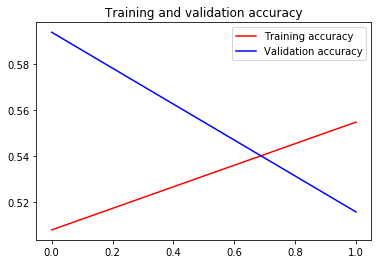

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
hist_dict = history.history
print(hist_dict.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()